In [1]:
import matplotlib.pyplot as plt
import numpy as np



In [48]:
#######LORENZ MODEL IMPLEMENTATION FROM Matplotlib documentation
def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 5000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values


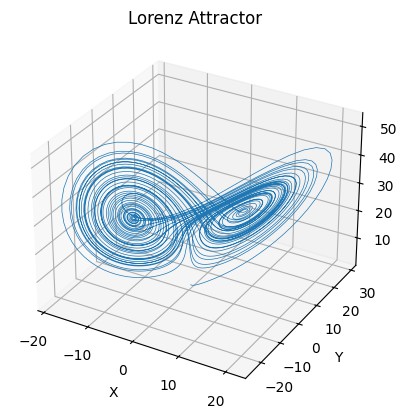

In [49]:
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt


ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X ")
ax.set_ylabel("Y ")
ax.set_zlabel("Z ")
ax.set_title("Lorenz Attractor")

plt.show()

Lorenz model has been a pedagogical example of a nonlinear system exhibiting chaotic dynamics, 
meaning a small perturbation in starting point leads to diverging dynamics over time. 
This model can be understood as describing a system where there are three degrees of freedom that are couple nonlinearly and 
evolve in a way that the effective dynamics rests on a 'Butterfly-wing' shaped geometrical object in the three dimensional parameter space.

In language of nonlinear dynamics, this geometrical shape, where the chaos of this model resides is a kind of 'attractor',
like a limit cycle.


The topology of this structure can be sort of recovered by inidviual measurements of each degree independently.
Which can be done, by looking at the 'lagged-trajectories' in the considered variable.


So put simply
If (X,Y,Z,..) space has nontrivial-attractors (i.e. the n variables correlated), 
has some nontrivial geometry,
Then individual variables (one of the correlated variable) contain 
the information of topology of that geometry in it's history of time-evolution.
So plotting ( A(t), A(t-s), A(t-2s)...) should allow you to recover aspects of topology,
where A can be anyone one of (X, Y, Z....) and s is a fixed window

In [50]:
#xyzs


In [51]:
def getxyzt(xyzs):
    "Extract x(t) y(t) z(t) from data"
    Xt,Yt,Zt=[],[],[]
    for i in range(len(xyzs)):
        x,y,z=xyzs[i]
        Xt.append(x)
        Yt.append(y)
        Zt.append(z)
    return Xt,Yt,Zt
        

In [52]:
def getlagged(Xt):
    "Get lagged data from x(t)"
    tau=10
    lxyzs=[]
    for i in range(2*tau,len(Xt)):
        lxyzs.append([Xt[i],Xt[i-tau],Xt[i-2*tau]])
    return lxyzs

In [53]:
X,Y,Z=getxyzt(xyzs)

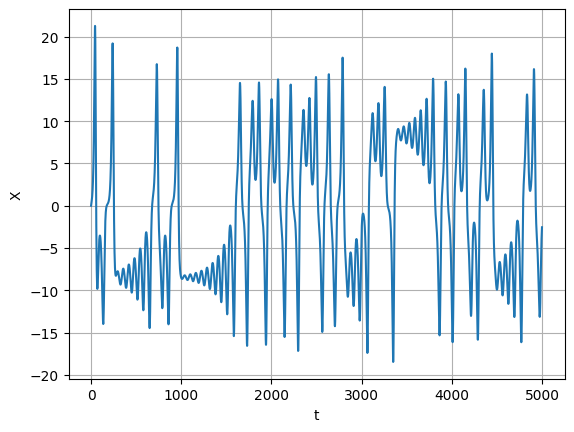

In [54]:
plt.plot(X)
plt.ylabel("X")
plt.xlabel("t")
plt.grid(which='major')


In [61]:
lx=getlagged(X)

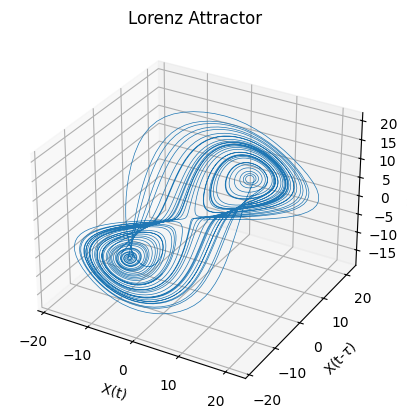

In [62]:
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*np.array(lx).T, lw=0.5)
ax.set_xlabel("X(t) ")
ax.set_ylabel(r"X(t-$\tau$)")
ax.set_zlabel(r"X(t-2$\tau$)")
ax.set_title("Lorenz Attractor")
plt.show()